<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521720---Truong-Y-Nhi/LSTM_7_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BỘ DỮ LIỆU DELL

In [26]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [27]:
# 2. Đọc file csv và gắng index với giá Close
df1 = pd.read_csv('/content/DELL.csv')
df1=df1.reset_index()['Close']

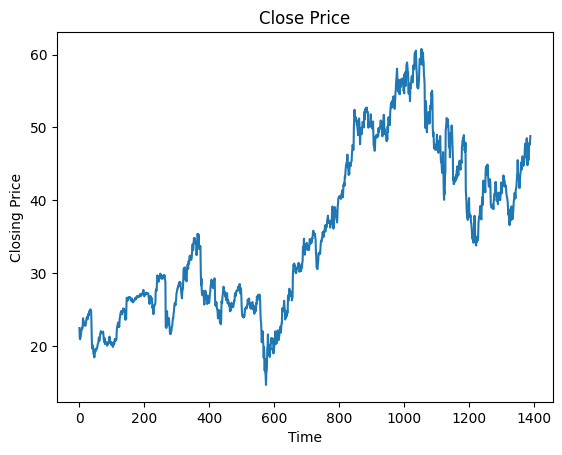

In [28]:
#Vẽ biểu đồ chuỗi thời gian của giá đóng cửa để kiểm tra xu hướng và dao động của dữ liệu:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.title('Close Price')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

In [29]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [31]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [34]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [10]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 13s 311ms/step - loss: 0.0548 - val_loss: 0.0221
Epoch 2/100
14/14 [==============================] - 3s 221ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 3/100
14/14 [==============================] - 3s 200ms/step - loss: 0.0032 - val_loss: 0.0091
Epoch 4/100
14/14 [==============================] - 5s 342ms/step - loss: 0.0021 - val_loss: 0.0082
Epoch 5/100
14/14 [==============================] - 3s 198ms/step - loss: 0.0019 - val_loss: 0.0076
Epoch 6/100
14/14 [==============================] - 3s 198ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 7/100
14/14 [==============================] - 3s 198ms/step - loss: 0.0018 - val_loss: 0.0069
Epoch 8/100
14/14 [==============================] - 5s 371ms/step - loss: 0.0018 - val_loss: 0.0072
Epoch 9/100
14/14 [==============================] - 3s 193ms/step - loss: 0.0018 - val_loss: 0.0061
Epoch 10/100
14/14 [==============================] - 4s 261ms/step - loss: 0.0017 - val_l

In [11]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 34ms/step


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [14]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 1.280596289108545
Testing RMSE: 1.8605682045634773
Testing MAE: 1.4187901366194389
Validation MAE: 1.0146155645908468
Testing MAPE: 3.322302416836556
Validation MAPE: 2.256937527535053


In [24]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.7515514]
101
1 day input [0.57236487 0.56261139 0.56109418 0.57128118 0.55654259 0.55004022
 0.5632616  0.57648298 0.60227543 0.59837413 0.57063088 0.59295554
 0.58970434 0.59403923 0.6087778  0.62351639 0.61549681 0.61051171
 0.6087778  0.60357593 0.59078804 0.58905413 0.59382245 0.58471926
 0.57149788 0.56369508 0.55936021 0.55350811 0.54527192 0.52966636
 0.50647479 0.52316405 0.5021399  0.47873163 0.47548046 0.49672131
 0.49585431 0.50755849 0.48956881 0.51839567 0.53140035 0.50820879
 0.50257341 0.49303671 0.50625809 0.51319387 0.53075006 0.54678913
 0.55437511 0.57084767 0.56868019 0.56716298 0.55480862 0.58081785
 0.58450245 0.59035455 0.60726062 0.6209154  0.63500376 0.6690325
 0.63283636 0.61311261 0.6172308  0.6079108  0.58688665 0.58601966
 0.61051171 0.62546708 0.63261958 0.65299343 0.66166322 0.64042235
 0.6666483  0.68030317 0.6794362  0.67618509 0.65169304 0.65299343
 0.65667812 0.6664316  0.67661849 0.70414495 0.71779982 0.71324822
 0.68745567 0.67791899 0.7249524  0

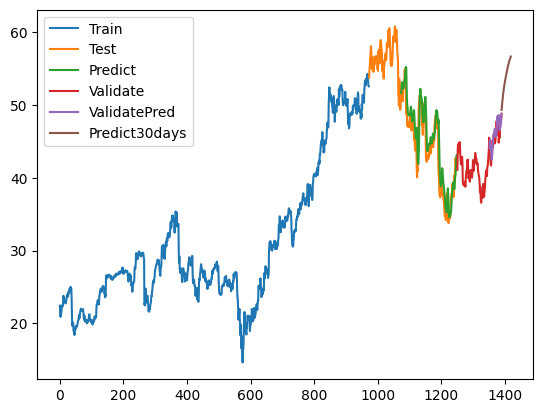

In [25]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
predict_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

BỘ DỮ LIỆU MSFT

In [35]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/MSFT.csv')
df1=df.reset_index()['Close']

In [36]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [37]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [38]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [39]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [41]:

# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [42]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 12s 293ms/step - loss: 0.0489 - val_loss: 0.0327
Epoch 2/100
14/14 [==============================] - 4s 297ms/step - loss: 0.0075 - val_loss: 0.0029
Epoch 3/100
14/14 [==============================] - 4s 303ms/step - loss: 0.0020 - val_loss: 0.0050
Epoch 4/100
14/14 [==============================] - 4s 277ms/step - loss: 0.0010 - val_loss: 0.0043
Epoch 5/100
14/14 [==============================] - 3s 201ms/step - loss: 8.8872e-04 - val_loss: 0.0037
Epoch 6/100
14/14 [==============================] - 4s 308ms/step - loss: 8.1775e-04 - val_loss: 0.0040
Epoch 7/100
14/14 [==============================] - 4s 248ms/step - loss: 7.8840e-04 - val_loss: 0.0037
Epoch 8/100
14/14 [==============================] - 5s 381ms/step - loss: 7.8701e-04 - val_loss: 0.0031
Epoch 9/100
14/14 [==============================] - 7s 485ms/step - loss: 7.9514e-04 - val_loss: 0.0035
Epoch 10/100
14/14 [==============================] - 3s 227ms/step - 

In [44]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 28ms/step


In [45]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [46]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [47]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 10.342771473995139
Testing RMSE: 8.50691086627849
Testing MAE: 6.9321131198964965
Validation MAE: 8.540603284655456
Testing MAPE: 0.02666191833810487
Validation MAPE: 0.027197597815988492


In [50]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9172002]
101
1 day input [0.61634168 0.61428081 0.60882345 0.63702633 0.63763696 0.61683783
 0.63630121 0.65515402 0.70037788 0.67652565 0.67049574 0.71167427
 0.70850674 0.69663781 0.69465334 0.7260238  0.72926773 0.71839109
 0.69102776 0.67541887 0.65484871 0.65042172 0.66286308 0.64168229
 0.64526968 0.64244555 0.63042405 0.6488952  0.66484755 0.6708774
 0.6604969  0.65877955 0.65351302 0.63927796 0.65961916 0.68583757
 0.7035836  0.74464765 0.75697441 0.7294967  0.73541201 0.72972568
 0.7502195  0.76132511 0.74533456 0.74094578 0.76109614 0.77460596
 0.79082548 0.78674206 0.78655117 0.77571273 0.80341952 0.79498541
 0.76995    0.77246881 0.7967027  0.78258225 0.79273365 0.79109265
 0.79139802 0.78246764 0.78113201 0.76590467 0.74167089 0.81780715
 0.85390986 0.86318369 0.85669584 0.85612341 0.85226885 0.85612341
 0.87612108 0.86848837 0.8621914  0.88245625 0.87406021 0.86970963
 0.8715796  0.8802809  0.8889059  0.90615579 0.90546888 0.91630732
 0.89371455 0.88833347 0.93439693 0

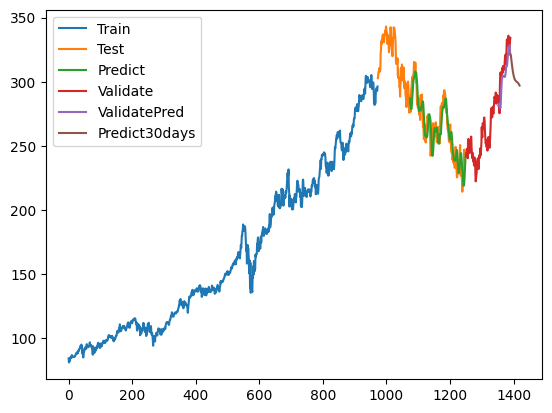

In [51]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

BỘ DỮ LIỆU ASUS


In [52]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/2357.TW.csv')
df1=df.reset_index()['Close']

In [53]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [54]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [55]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [56]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [57]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [58]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [59]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 13s 394ms/step - loss: 0.0528 - val_loss: 0.0243
Epoch 2/100
14/14 [==============================] - 5s 403ms/step - loss: 0.0106 - val_loss: 0.0061
Epoch 3/100
14/14 [==============================] - 3s 198ms/step - loss: 0.0042 - val_loss: 0.0086
Epoch 4/100
14/14 [==============================] - 4s 299ms/step - loss: 0.0035 - val_loss: 0.0075
Epoch 5/100
14/14 [==============================] - 3s 209ms/step - loss: 0.0031 - val_loss: 0.0073
Epoch 6/100
14/14 [==============================] - 5s 345ms/step - loss: 0.0031 - val_loss: 0.0066
Epoch 7/100
14/14 [==============================] - 3s 240ms/step - loss: 0.0029 - val_loss: 0.0052
Epoch 8/100
14/14 [==============================] - 3s 211ms/step - loss: 0.0025 - val_loss: 0.0034
Epoch 9/100
14/14 [==============================] - 6s 456ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 10/100
14/14 [==============================] - 4s 263ms/step - loss: 0.0022 - val_l

In [60]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 30ms/step


In [61]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [62]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
yval = scaler.inverse_transform(yval.reshape(-1,1))

In [63]:
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))
valid_mape = np.mean(np.abs((yval - y_pred_val) / yval))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mape)
print('Validation MAPE:', valid_mape)

Validation RMSE: 5.300821757943655
Testing RMSE: 6.6257009808512635
Testing MAE: 4.69790219975089
Validation MAE: 3.851179235121783
Testing MAPE: 0.01631006579533907
Validation MAPE: 0.012846730915003875


In [64]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.6359663]
101
1 day input [0.42259414 0.43723849 0.41422594 0.41213389 0.39539749 0.40794979
 0.41213389 0.40794979 0.458159   0.42468619 0.43723849 0.45188285
 0.44979079 0.44142259 0.44979079 0.44769874 0.44142259 0.41631799
 0.43514644 0.44351464 0.44142259 0.44979079 0.45606695 0.44979079
 0.45606695 0.45606695 0.46025105 0.44979079 0.44142259 0.4623431
 0.4748954  0.48535565 0.49790795 0.48953975 0.48117155 0.5125523
 0.39958159 0.37866109 0.38075314 0.38702929 0.42050209 0.39958159
 0.41004184 0.41213389 0.41422594 0.41631799 0.41422594 0.41004184
 0.42259414 0.42677824 0.42677824 0.41841004 0.41631799 0.42050209
 0.43096234 0.45188285 0.43933054 0.44769874 0.4623431  0.45188285
 0.45188285 0.44351464 0.44142259 0.45188285 0.44979079 0.43933054
 0.458159   0.46861925 0.4832636  0.48953975 0.5083682  0.4958159
 0.49372385 0.5083682  0.50627615 0.48535565 0.46443515 0.55648536
 0.55648536 0.55648536 0.57531381 0.57531381 0.56903766 0.57112971
 0.57531381 0.56066946 0.57740586 0.5

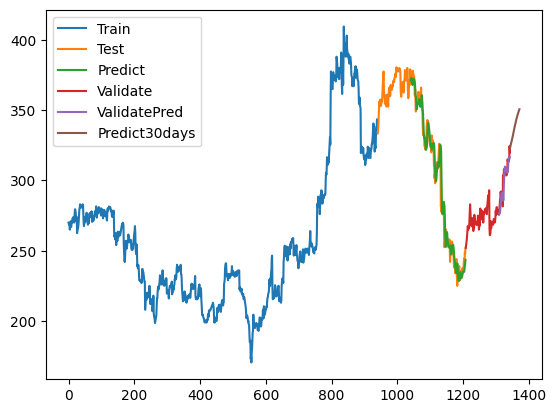

In [65]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()